# Task 02: Photovoltaics


`Author: Rolf Becker, Version: V003, Date: 2022-07-22, License: CC BY-NC-SA 4.0`

## 1. Introduction: The Sandia PV Performance Modeling Collaborative


The US Sandia National Laboratories are renowned for their research and development in renewable energies. They established the **PV Performance Modeling Collaborative (PVPMC)**, a collabration between industry and national laboratory. The home page of PVPMC is here: https://pvpmc.sandia.gov/

<img src="./images/pvpmc2.png" width=1000 />

_Fig. 1: PV performance modelling steps._ (Source: https://pvpmc.sandia.gov/)


The PVPMC defined 10 modelling steps to assess PV module performance shown the the above diagram (Fig. 1). 

This exercise focuses on the **first two modeling steps:**
1. Irradiance and Weather
1. Incidence Irradiance

Click on the menu item `Modelling Steps` of [PVPMC home page](https://pvpmc.sandia.gov/). This opens a new [sub page](https://pvpmc.sandia.gov/modeling-steps/) describing the modelling steps. 

**Q 1.1:** Skim _Chapter 1: Weather and Design_ of the [modeling steps documentation](https://pvpmc.sandia.gov/modeling-steps/) to get a rough overview of the **first two modeling steps!**

Completed

**Q 1.2:** Read the section [Irradiance & Insolation](https://pvpmc.sandia.gov/modeling-steps/1-weather-design-inputs/irradiance-and-insolation-2/) (not insulation!). 
 How do you determine (= calculate) the insolation from the irradiance? What are typcial units for these two quantities?

**Answer:** The typical unit for insolation is kilowatt hours per square meter, for irradiance - watts per square meter. To determine insolation from irradiance we have to multiply irradiance by the measurement time. (Irradiance - instantaneous measurement of solar power over some area).

**Q 1.3:** What are normal irradiance, diffuse horizontal irradiance and global horizontal irradiance? What are the typical abbreviations / variable names of these quantities?

**Answer:** Direct normal irradiance (DNI) - the measurement of the radiation with a small field of view (~5 degrees) using cavity radiometer or pyrheliometer (thermopile sensors at the base of a light-collimating tube and glass window face).
Diffuse horizontal irradiance (DHI) - is the terrestrial irradiance received by a horizontal surface which has been scattered or diffused by the atmosphere.
Global horizontal irradiance (GHI) - is the amount of terrestrial irradiance falling on a surface horizontal to the surface of the earth. GHI can be measured with a variety of instruments. 

**Q 1.4:** How do you measure these three radiation components? Find a photo in the internet showing an integrated measuring system combining the necessary sensors. Download the photo into the `images` folder of this task. Paste the image into your answer. Tip: Look up how to insert an image in the markdown cell showing the figure above. 

**Answer:** 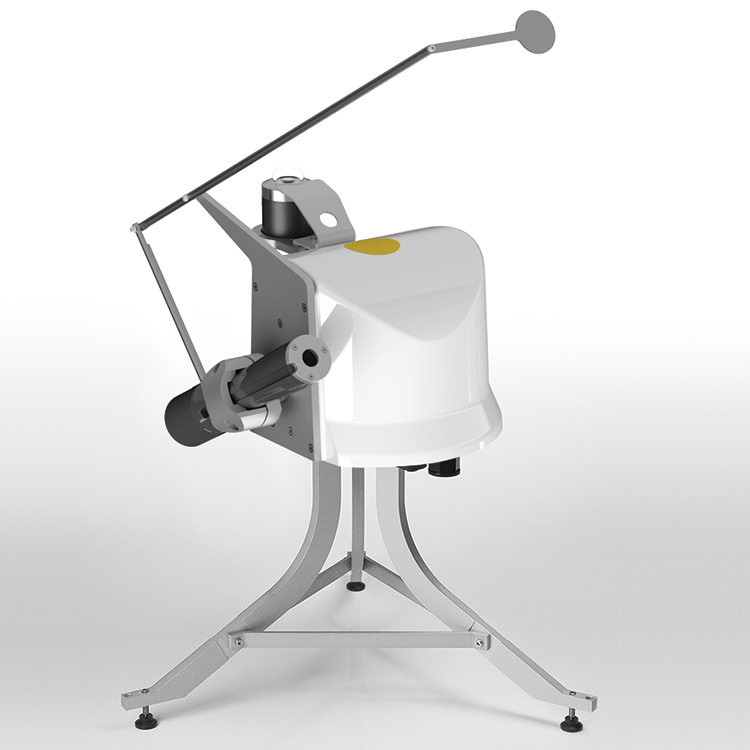...
RaZON+ is an all-in-one system that accurately measures both direct normal irradiance (DNI) and diffuse horizontal irradiance (DHI)
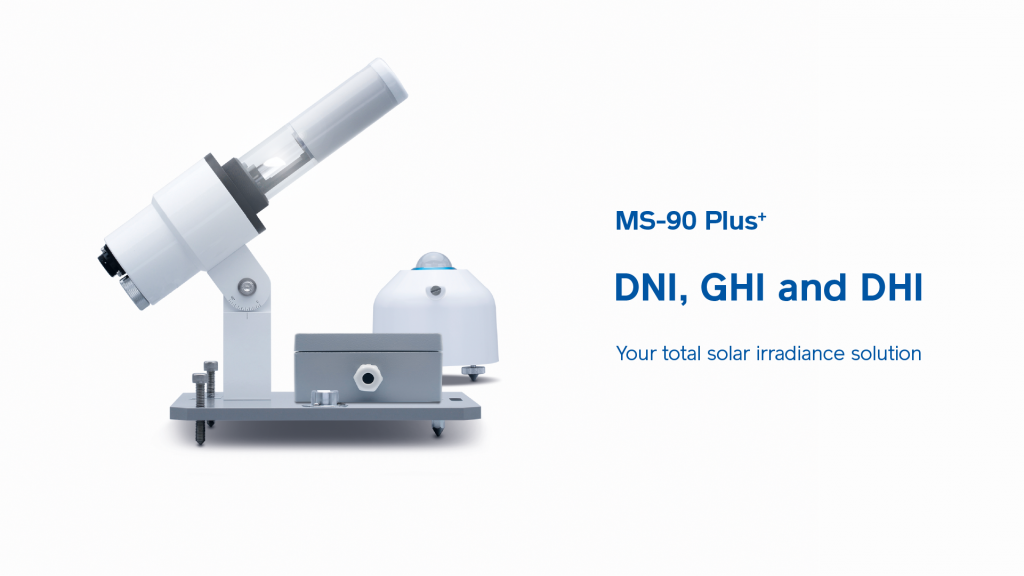
https://www.meteorologicaltechnologyinternational.com/supplier-spotlight/eko-instruments

## 2. PVLIB Python Library

The PVPMC provides the comprehensive library `pvlib` for numerical quantitative evaluation of planned PV power plants and support during the design phase. 
All functions needed for the modeling steps are implemented in two programming libraries provided for Matlab and Python, respectively. 

**Q: 2.1** Create a Conda environment and Install the library.

Relevant links are:

* pvlib toolbox home page: https://pvpmc.sandia.gov/applications/pv_lib-toolbox/
* Source code as well as example and tutorial code: https://github.com/pvlib/pvlib-python
* Documentation: https://pvlib-python.readthedocs.io/en/latest/index.html

It is highly recommended (but not mandatory) that you create a dedicated conda environment first with all necessary installations (e.g. jupyter, numpy, etc.) and to install pvlib into that isolated environment.

Execute 
<br>
`conda create -c conda-forge -n pvlib python=3 jupyterlab matplotlib pvlib-python` 
<br>on the Anaconda prompt (Windows) or another terminal. 

In this terminal activate the new conda environment (`conda activate pvlib`), change to your intended project root folder (`cd ...`), and start JupyterLab in this environment (`jupyter lab`). The folder you start Jupyter from will be the topmost folder (root folder) in the Jupyter file browser.



In [37]:
import pvlib
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

**Q: 2.2** Get an **overview** of the [pvlib software documentation](https://pvlib-python.readthedocs.io/en/latest/index.html) (intro, tutorial, gallery, api reference). The [API reference](https://pvlib-python.readthedocs.io/en/latest/api.html) provides a list of all functions and classes provided by the toolbox.
<br>What does `pvlib.location.Location.get_clearsky()` do?

**Answer:** Calculation the clear sky estimates of GHI, DNI, and/or DHI at a certain location.

## 3. Plane of Array (POA) Irradiance with Clear Sky Assumption

Read https://pvpmc.sandia.gov/modeling-steps/1-weather-design-inputs/plane-of-array-poa-irradiance/

When you set up a solar PV generator it usally consists of a set of modules which is called array. The normal vector (aka normal) of the array is the direction vector (unit length) perpendicular on the PV modules surface. Usually all modules of an PV module array point in the same direction, i.e. have the same normal vector. These parallel PV module surfaces are summarized as the **Plane of Array (POA)**. The direction of the POA is the direction of each module.



The function [**pvlib.irradiance.get_total_irradiance()**](https://pvlib-python.readthedocs.io/en/stable/reference/generated/pvlib.irradiance.get_total_irradiance.html) does the main job to get the irradiance at the surface of the PV array, i.e. on the POA. The function transforms and projects the radiation components (dni, ghi, dhi) for a given solar position (solar_zenith, solar_azimuth) onto the POA with its specific surface orientation (POA normal vector, surface_tilt, surface_azimuth). The module orientation is fixed, but solar position as well as radiation components are time series varying with time of day, season and even weather conditions, e.g. if radiation data of the "typical meteorological year" (TMY) is used instead of clear sky radiation. 




**Q 3.1:** The pylib documentation shows an example how to perform the transformation from GHI to the POA irradiance. 
<br>**Study and reuse the code** [**GHI to POA Transposition**](https://pvlib-python.readthedocs.io/en/stable/gallery/irradiance-transposition/plot_ghi_transposition.html). 

This code follows an object oriented approach in which the variable `site` is a `Location` object **([pvlib.location.Location](https://pvlib-python.readthedocs.io/en/v0.9.0/generated/pvlib.location.Location.html))**. Have a look at the [**function's source code**](https://pvlib-python.readthedocs.io/en/stable/_modules/pvlib/location.html).


The Location object `site` provides the functions to get the clear sky irradiance components as well as the solar position: 
```
clearsky       = site_location.get_clearsky(times)
solar_position = site_location.get_solarposition(times=times)
```

These two time series then enter the function `pvlib.irradiance.get_total_irradiance()` which does the transformation onto the POA.

In the given example linked to above during summer solstice the POA irradiance and the GHI are almost equal. So why are PV modules on flat roofs in most cases installed with a tilt angle, if POA and GHI are almost equal during summer? 


**Answer:** PV modules are usually tilted on an angle because of maximasing the exposure of a particular PV module to the sun. So that they could face the sun directly maximum amount of time (increased efficiency).

### Background Information
#### Time Zones
* Time zone list: https://en.wikipedia.org/wiki/List_of_tz_database_time_zones
* PVLIB doc on time and time zones: https://pvlib-python.readthedocs.io/en/v0.4.3/timetimezones.html

#### Location Class, Location Object
* Documentation: https://pvlib-python.readthedocs.io/en/v0.9.0/generated/pvlib.location.Location.html
* **Source code** of Location class: https://pvlib-python.readthedocs.io/en/stable/_modules/pvlib/location.html

In [38]:
# get online help
? pvlib.location.Location

**Q 3.2:** Create a **Location object** for the GFL location and Store it in a **dictionary** named `sites`. Use the **name as key.** Find the right **time zone name** from the Wikipediia link above!

In [46]:
name = "GFL"
tz = "Europe/Berlin"
lat = 51.498
lon = 6.549
alt = 20.0

# later a Location object is needed to call the function get_solarposition()
site = pvlib.location.Location(lat, lon, tz, alt, name)

sites = {name : site}

print(sites["GFL"])

Location: 
  name: GFL
  latitude: 51.498
  longitude: 6.549
  altitude: 20.0
  tz: Europe/Berlin


**Q 3.3:** Calculate the **POA irradiance** for modules **in the garden of the Green Fab Lab Kamp-Lintfort** for the year 2020! Modify the above mentioned example code. 

* For simplicity use the **clear sky** irradiance model (as in the example).
* Use **three dates: winter solstice, spring equinoxe, and summer solstice.** 
* The modules are oriented exactly to the **southwest (SW)** (and not to the south (180°)).
* Do the analysis for **two different tilt angles: 30° and 60°.**<br>(A module lying flat on the ground has a tilt angle of 0°)
* Plot all six cases in **six subplots arranged in three rows and two columns (3x2)**. 

The columns contain the simulations for 30° and 60° tilt angle, respectively. First, second and third row show the results for winter solstice, spring equinoxe and summer solstice, respectively. **Use the same axes scaling for all six plots.**

The figure below shows an **example for 2x2 subplots with shared axes:**

<img src="./images/subplots_shared_axes.png" width=600 />

You can learn more about subplots with the Jupyter notebook `subplots_demo.ipynb`. You find it online as part of the official matplotlib documentation (demo section) and a slightly modified local copy in the folder of this notebook. 



**Your final result should look similar (not necessarily identical) to the following solution:**

<img src="./images/GFL_CS_GHI_POA.png" width=900 />


In [40]:
# HELPER FUNCTION!
# Calculate clear-sky GHI and transpose to plane of array
# Define a function so that we can re-use the sequence of operations with
# different locations

from pvlib import location
from pvlib import irradiance

def get_irradiance(site_location, date, tilt, surface_azimuth):
    # Creates one day's worth of 10 min intervals
    times = pd.date_range(date, freq='10min', periods=6*24,
                          tz=site_location.tz)
    # Generate clearsky data using the Ineichen model, which is the default
    # The get_clearsky method returns a dataframe with values for GHI, DNI,
    # and DHI
    clearsky = site_location.get_clearsky(times)
    # Get solar azimuth and zenith to pass to the transposition function
    solar_position = site_location.get_solarposition(times=times)
    # Use the get_total_irradiance function to transpose the GHI to POA
    POA_irradiance = pvlib.irradiance.get_total_irradiance(
        surface_tilt=tilt,
        surface_azimuth=surface_azimuth,
        dni=clearsky['dni'],
        ghi=clearsky['ghi'],
        dhi=clearsky['dhi'],
        solar_zenith=solar_position['apparent_zenith'],
        solar_azimuth=solar_position['azimuth'])
    
    # Return DataFrame with only GHI and POA
    return pd.DataFrame({'GHI': clearsky['ghi'],
                         'POA': POA_irradiance['poa_global']})



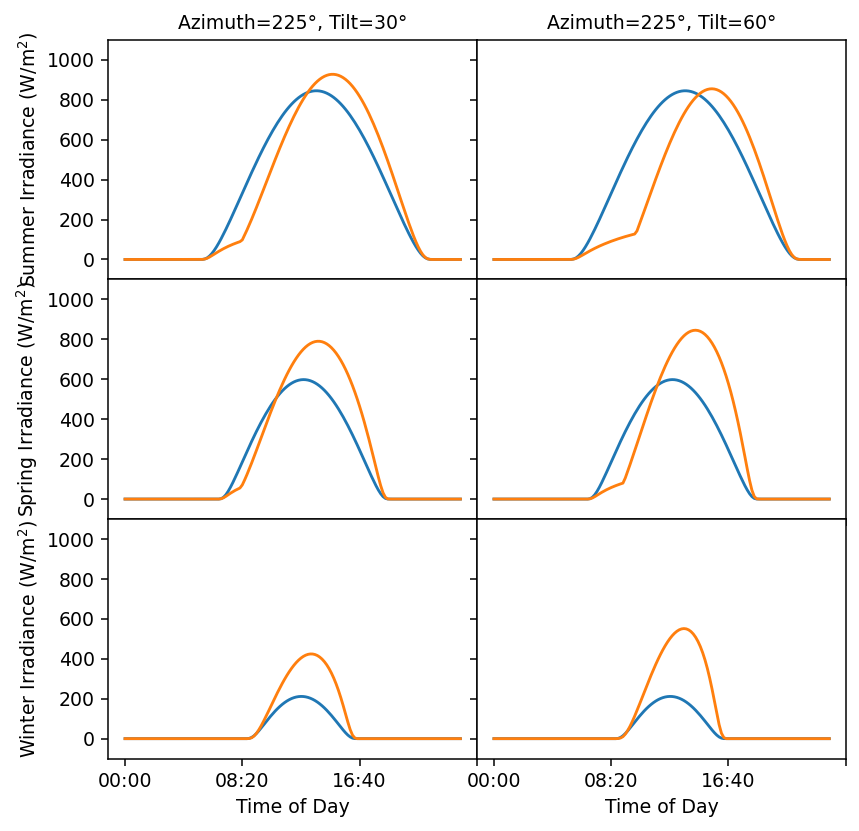

In [149]:
# Code:

tilt1 = 30
tilt2 = 60

surface_azimuth1 = 225
surface_azimuth2 = 225

winter = "2019-12-21"
spring = "2019-03-21"
summer = "2019-06-21"

winter_irradiance_1 = get_irradiance(site, winter, tilt1, surface_azimuth1)
winter_irradiance_2 = get_irradiance(site, winter, tilt2, surface_azimuth2)
spring_irradiance_1 = get_irradiance(site, spring, tilt1, surface_azimuth1)
spring_irradiance_2 = get_irradiance(site, spring, tilt2, surface_azimuth2)
summer_irradiance_1 = get_irradiance(site, summer, tilt1, surface_azimuth1)
summer_irradiance_2 = get_irradiance(site, summer, tilt2, surface_azimuth2)

# Convert Dataframe Indexes to Hour:Minute format to make plotting easier
summer_irradiance_1.index = summer_irradiance_1.index.strftime("%H:%M")
winter_irradiance_1.index = winter_irradiance_1.index.strftime("%H:%M")
spring_irradiance_1.index = spring_irradiance_1.index.strftime("%H:%M")
summer_irradiance_2.index = summer_irradiance_2.index.strftime("%H:%M")
winter_irradiance_2.index = winter_irradiance_2.index.strftime("%H:%M")
spring_irradiance_2.index = spring_irradiance_2.index.strftime("%H:%M")

fig = plt.figure(figsize=(7,7), dpi=136)
gs = fig.add_gridspec(3, 2, hspace=0.0, wspace=0.0)

# two kinds of axis references
axs = (ax1, ax2), (ax3, ax4), (ax5, ax6) =  gs.subplots(sharex='col', sharey='row')

summer_irradiance_1['GHI'].plot(ax=ax1, label='GHI')
summer_irradiance_1['POA'].plot(ax=ax1, label='POA')
summer_irradiance_2['GHI'].plot(ax=ax2, label='GHI')
summer_irradiance_2['POA'].plot(ax=ax2, label='POA')
ax1.set_ylabel('Summer Irradiance ($\mathrm{W/m^2}$)')


spring_irradiance_1['GHI'].plot(ax=ax3, label='GHI')
spring_irradiance_1['POA'].plot(ax=ax3, label='POA')
spring_irradiance_2['GHI'].plot(ax=ax4, label='GHI')
spring_irradiance_2['POA'].plot(ax=ax4, label='POA')
ax3.set_ylabel('Spring Irradiance ($\mathrm{W/m^2}$)')

winter_irradiance_1['GHI'].plot(ax=ax5, label='GHI')
winter_irradiance_1['POA'].plot(ax=ax5, label='POA')
winter_irradiance_2['GHI'].plot(ax=ax6, label='GHI')
winter_irradiance_2['POA'].plot(ax=ax6, label='POA')
ax5.set_ylabel('Winter Irradiance ($\mathrm{W/m^2}$)')

for row in axs:
    for ax in row:
        ax.set_ylim(-100,1100)

ax1.set_title(f"Azimuth={surface_azimuth1:d}°, Tilt={tilt1:d}°", fontsize="medium")
ax2.set_title(f"Azimuth={surface_azimuth1:d}°, Tilt={tilt2:d}°", fontsize="medium")

ax5.set_xlabel('Time of Day')
ax6.set_xlabel('Time of Day')

# row indexes to be used as labels
xtick_idx = np.arange(0,144,12)
xtick_labels = winter_irradiance_1.index[xtick_idx]

plt.show()


**Q 3.4:** The daily **GHI curves look symmetrical**, i.e. you can flip them around a vertical axis in the center of the curve and they look the same. But the POA curces have kinks and dents and the locations (times) of their maxima do not coincide with the locations of the GHI maxima. **So why are the POA curves asymmetric?**

**Answer:** Because the POA irradience will be maximum when the light from the Sun comes directly and perpendicular to the PV module. It happens later then the GHI reaches maximum because the PV module is installed with an angle (tilted).

**Q 3.5:** What do observe when you compare the insolation for the two tilt angles? Which tilt is "better"?

**Answer:** The best angle is that angle with which the PV module could take maximun of energy from the Sun for a longer time period. It means that the best angle provides maximum exposuring and accordingly maximum efficiency for the particular PV module.


## 4. Plot the Sun Paths for Kamp-Lintfort

In the above example we just used three different days of the year but the sun path varies over the year (see [**Sun Path**](https://en.wikipedia.org/wiki/Sun_path) on Wikipedia). We discussed the sun path diagram in Physics 2. 
<br>**Start with** [**this code**](https://pvlib-python.readthedocs.io/en/stable/gallery/solar-position/plot_sunpath_diagrams.html) and adapt it accordingly!


**Q 4.1:** Plot the sun paths for Kamp-Lintfort in **polar** as well as **Cartesian** cordinates. Plot single-day sun paths for the winter and summer solstices as well as the spring equinox. Use the right time zone as well as geographical coordinates for Kamp-Lintfort. The polar plot and of the solar path will then show the time in UTC. 
<br>Create a larger plot than the default, e.g. use something like `fig, ax = plt.subplots(figsize = (8,6), dpi = 150)`.

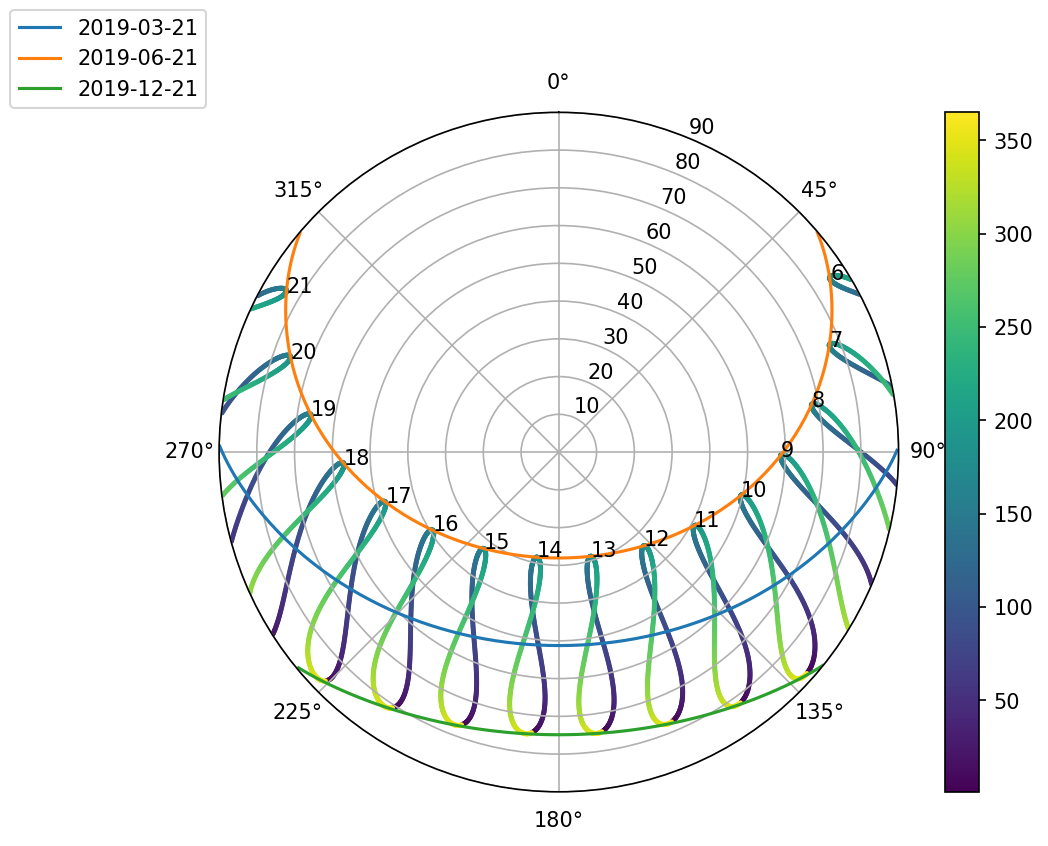

In [48]:
# Code for POLAR COORDINATES
from pvlib import solarposition

fig, ax = plt.subplots(figsize = (8,6), dpi = 150)
 
tz = "Europe/Berlin"
lat, lon = 51.498, 6.549

times = pd.date_range('2019-01-01 00:00:00', '2020-01-01', closed='left',
                      freq='H', tz=tz)
solpos = solarposition.get_solarposition(times, lat, lon)
solpos = solpos.loc[solpos['apparent_elevation'] > 0, :]

ax = plt.subplot(1, 1, 1, projection='polar')
points = ax.scatter(np.radians(solpos.azimuth), solpos.apparent_zenith,
                    s=2, label=None, c=solpos.index.dayofyear)
ax.figure.colorbar(points)

for hour in np.unique(solpos.index.hour):
    subset = solpos.loc[solpos.index.hour == hour, :]
    r = subset.apparent_zenith
    pos = solpos.loc[r.idxmin(), :]
    ax.text(np.radians(pos['azimuth']), pos['apparent_zenith'], str(hour))

for date in pd.to_datetime(['2019-03-21', '2019-06-21', '2019-12-21']):
    times = pd.date_range(date, date+pd.Timedelta('24h'), freq='5min', tz=tz)
    solpos = solarposition.get_solarposition(times, lat, lon)
    solpos = solpos.loc[solpos['apparent_elevation'] > 0, :]
    label = date.strftime('%Y-%m-%d')
    ax.plot(np.radians(solpos.azimuth), solpos.apparent_zenith, label=label)

ax.figure.legend(loc='upper left')

ax.set_theta_zero_location('N')
ax.set_theta_direction(-1)
ax.set_rmax(90)

plt.show()

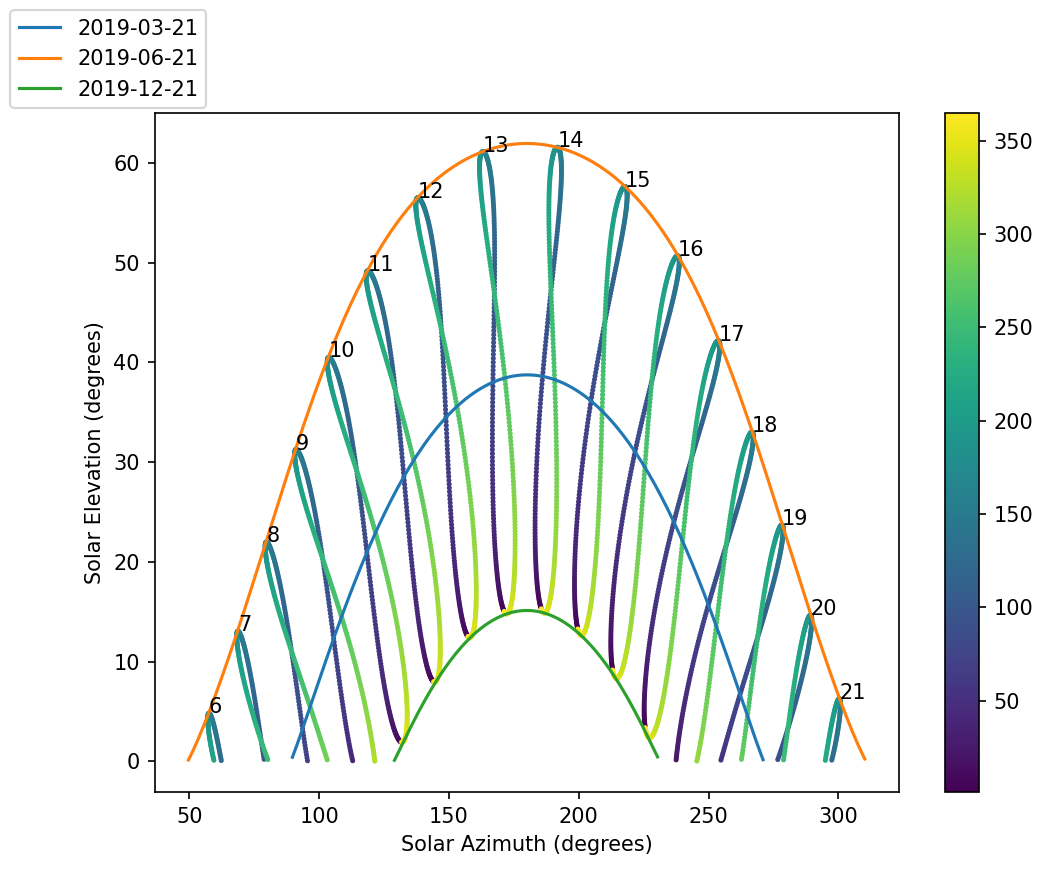

In [52]:
# Code for CARTESIAN COORDINATES

times = pd.date_range('2019-01-01 00:00:00', '2020-01-01', closed='left',
                      freq='H', tz=tz)

solpos = solarposition.get_solarposition(times, lat, lon)
solpos = solpos.loc[solpos['apparent_elevation'] > 0, :]

fig, ax = plt.subplots(figsize = (8,6), dpi = 150)
points = ax.scatter(solpos.azimuth, solpos.apparent_elevation, s=2,
                    c=solpos.index.dayofyear, label=None)
fig.colorbar(points)

for hour in np.unique(solpos.index.hour):
    subset = solpos.loc[solpos.index.hour == hour, :]
    height = subset.apparent_elevation
    pos = solpos.loc[height.idxmax(), :]
    ax.text(pos['azimuth'], pos['apparent_elevation'], str(hour))

for date in pd.to_datetime(['2019-03-21', '2019-06-21', '2019-12-21']):
    times = pd.date_range(date, date+pd.Timedelta('24h'), freq='5min', tz=tz)
    solpos = solarposition.get_solarposition(times, lat, lon)
    solpos = solpos.loc[solpos['apparent_elevation'] > 0, :]
    label = date.strftime('%Y-%m-%d')
    ax.plot(solpos.azimuth, solpos.apparent_elevation, label=label)

ax.figure.legend(loc='upper left')
ax.set_xlabel('Solar Azimuth (degrees)')
ax.set_ylabel('Solar Elevation (degrees)')

plt.show()

**Q 4.2:** What is the solar zenith angle at Kamp-Lintfort on summer solstice at 10:00 UTC? 

**Answer:** The zenith angle on 21st of june at 10:00 is 103.32.

**Q 4.3:** What is the 10:00 UTC in local time for summer and in winter, respectively?

**Answer:** Summer: 12:00; Winter: 11:00

**Q 4.4:** What is an analemma?

**Answer:** That is the plot of the position of the Sun in every particular moment every day (every day at the same moment) on the Earth's sky from the specific location. Analemma form a figure similar to the number 8.

## 5. Typical Meteorological Year (TMY) from the PVGIS Tools

The clear sky assumption having been used so far to estimate GHI, DHI, and DNI irradiance components does not take into account any weather conditions! The performance estimates based on clear sky assumption are less precise. It would be better to have real site specific data but unfortunatly the precise measurement of the irradiance componentsis difficult and expensive. 


### Radiation Databases

A good alternative is the usage of **satellite data** to regionalize the irradiance. The ground level irradiance data cannot be observed directly from satellites but estimated by means of available satellite measurements, radiation modeling as well as ground truth (ground measurement) data for calibration.

One solution (aka product) is provided by the [Satellite Application Facility on Climate Monitoring (CM-SAF)](https://www.cmsaf.eu/EN/Home/home_node.html). The website states: "CM-SAF develops, generates, archives and distributes high-quality satellite-derived products of the global energy & water cycle and related sustained services in support to understand our climate." And "The new CMSAF solar radiation product SARAH-2.1 (PVGIS-SARAH2) has been added to PVGIS with data from 2005 to 2020." ([PVGIS 5.2 release notes](https://joint-research-centre.ec.europa.eu/pvgis-photovoltaic-geographical-information-system/pvgis-releases/pvgis-52_en)). The Joint Research Center (JRC) of the European Commission (EC) provide the [PVGIS tools](https://joint-research-centre.ec.europa.eu/pvgis-photovoltaic-geographical-information-system_en) for PV systems design. This ground level SARAH-2 radiation data is accessible through PVGIS. 

Several radiation databases are combined and used by default for different regions. 
The [PVGIS 5.2 Release Notes](https://joint-research-centre.ec.europa.eu/pvgis-photovoltaic-geographical-information-system/pvgis-releases/pvgis-52_en) states: 
<br>"The new default radiation database is a combination of PVGIS-SARAH2 and PVGIS-SARAH (Europe, Africa, Central Asia), PVGIS-NSRDB (Americas) and PVGIS-ERA5 (Nordic countries above 60 N and the rest of the world)."

<img src="./images/PVGIS_Default_Solar_Radiation_Database_100ppi_1.png" width=600 />

_Fig.: Default Solar Radiation Databases in PVGIS 5.2, European Union, 2022_.
<br>(Source: [PVGIS 5.2 Release Notes](https://joint-research-centre.ec.europa.eu/pvgis-photovoltaic-geographical-information-system/pvgis-releases/pvgis-52_en))


PVGIS uses and provides the radiation data in three ways: 

1. the radiation data is directly used in the PVGIS interactive web dashboard.
1. The data can be downloaded from the PVGIS website, too.
1. The data is provoded as a [non-inteactive service API](https://joint-research-centre.ec.europa.eu/pvgis-photovoltaic-geographical-information-system/getting-started-pvgis/api-non-interactive-service_en).

The latter method uses web requests to retrieve the data from the central PVGIS radiation database.
The PVLIB Python library uses this PVGIS Web API. The [pvlib.iotools.pvgis](https://pvlib-python.readthedocs.io/en/stable/_modules/pvlib/iotools/pvgis.html) source code shows how this is done. 



**Q 5.1:** The source code defines several functions: Most of them start with an underscore `_`. These functions are for internal use only (private). But four function names do not start with an underscore and are therefore externally available. What are these four function? Some functions start with `get_` others with `read_`. What is the difference between these functions?


**Answer:** 1) get_pvgis_hourly; 2) read_pvgis_hourly; 3) get_pvgis_tmy; 4) read_pvgis_tmy; The difference between get_ and read_ functions are that 'get' function just gets data from resourse but 'read' function reads this file with data.

### TMY Data

An analysis of hourly radiation data for decades of data availability can be cumbersome, too, because of the amount of data. Therefore radiation data is often summarized in TMY: From multi-year time series the months are selected, which are most representative. The PVGIS Tools provides such a TMY generator as a web service with a Web API. 

The `pvlib.iotools.get_pvgis_tmy()` function utilizes the PVGIS TMY web service and retreives the data through a web request.


### Supplementary Information

This link list is uncommented but may be useful.

On TMY:
* https://en.wikipedia.org/wiki/Typical_meteorological_year
* https://www.pveducation.org/pvcdrom/properties-of-sunlight/typical-meteorological-year-data-tmy
* https://e3p.jrc.ec.europa.eu/articles/typical-meteorological-year-tmy

From the Joint Research Center (JRC) of the European Commission, on PVGIS Tools
* PVGIS: https://joint-research-centre.ec.europa.eu/pvgis-photovoltaic-geographical-information-system_en
* TMY Generator: https://joint-research-centre.ec.europa.eu/pvgis-photovoltaic-geographical-information-system/pvgis-tools/tmy-generator_en
* TMY Generator Web Service: https://joint-research-centre.ec.europa.eu/pvgis-photovoltaic-geographical-information-system/getting-started-pvgis/api-non-interactive-service_en

JRC TMY RESTful API:
* https://re.jrc.ec.europa.eu/api/DRcalc?lat=45&lon=8&month=3&global=1&outputformat=json

The PVGIS Radiation Databases Downloads:
* https://joint-research-centre.ec.europa.eu/pvgis-photovoltaic-geographical-information-system/pvgis-data-download_en

The functions `pvlib.iotools.get_pvgis_tmy()` and `pvlib.iotools.get_pvgis_hourly()` use the web request API to retrieve data from the PVGIS databases.
* Source code for pvlib.iotools.pvgis: https://pvlib-python.readthedocs.io/en/stable/_modules/pvlib/iotools/pvgis.html
* Help on get_pvgis_tmy(): https://pvlib-python.readthedocs.io/en/stable/reference/generated/pvlib.iotools.get_pvgis_tmy.html
* Help on get_pvgis_hourly(): https://pvlib-python.readthedocs.io/en/stable/reference/generated/pvlib.iotools.get_pvgis_hourly.html


### The PVGIS Web API: Hourly Time Series for the Year 2016

**Q 5.2:** Play with the PVGIS non-interactive web service. **Read the [TMY generator API documentation](https://joint-research-centre.ec.europa.eu/pvgis-photovoltaic-geographical-information-system/getting-started-pvgis/api-non-interactive-service_en)! Learn how to use it!**

Example: The following GET request provides the **hourly radiation** for (Lat,Lon) = (45°, 8°) with JSON output format:
<br>
**https://re.jrc.ec.europa.eu/api/seriescalc?lat=45&lon=8&startyear=2013&endyear=2013&outputformat=csv**

The **query string** of this request is `lat=45&lon=8&startyear=2013&endyear=2013&outputformat=csv`. 

The result of this request is displayed in the browser window. The text is confusing and pretty useless: Line breaks are not rendered correctly.

**Build your own GET request!** Use this Web API to retrieve the daily radiation data for:
* location: Green Fab Lab (**NOT** (Lat,Lon) = (45°, 8°))
* year: **2016** only!
* get **all radiation components** (i.e. columns (= series) `Gb(i), Gd(i), Gr(i)` must be contained in the downloaded file) 
* output format: **CSV**
* output as **downloadable file** (not as stream). 

Read the API doc to identify the **query string option** which makes the browser opening a **download dialog** to save the file (instead of showing the content in the browser window). See the API documentation to identify the query string option that causes the browser to open a download dialog to save the file (instead of displaying the content in the browser window).

Save the downloaded CSV file into the **local directory `./data`.**

**Answer:** Hourly:https://re.jrc.ec.europa.eu/api/seriescalc?lat=51.498&lon=6.549&startyear=2016&outputformat=csv&browser=1

**Answer:** Daily:https://re.jrc.ec.europa.eu/api/DRcalc?lat=51.498&lon=6.549&startyear=2016&outputformat=csv&browser=1

**Answer:** Monthly:https://re.jrc.ec.europa.eu/api/MRcalc?lat=51.498&lon=6.549&startyear=2016&outputformat=csv&browser=1

TMY: https://re.jrc.ec.europa.eu/api/TMY?lat=51.498&lon=6.549&startyear=2016&outputformat=csv&browser=1

**Answer:** The GET request to download the data is: **https://re.jrc.ec.europa.eu/api/seriescalc?lat=51...&lon=6...&startyear=2016&...&...**
<br>(The GET request should be such that when a user left(!) clicks on the link, the browser initiates the download, opens a dialog box and asks where the data should be stored.) 

**Q 5.3:** Open the downloaded hourly radiation data file (CSV format) with an editor. How is it structured?
What do the column names `Gb(i), Gd(i), Gr(i)` mean? You find this metadata in the CSV file.

Read the radiation data only into a pandas **dataframe** for the **Green Fab Lab location!** The easiest way to limit the CSV file to the radiation data including column headers only is to skip the first rows (`skiprows=...)` and then to read just the right number of rows (`nrows=...`). The number of rows are known in advance. you are reading hourly data for a year ...

**Answer:** The column names `Gb(i), Gd(i), Gr(i)` mean Gr(i): Global irradiance on the horizontal plane (W/m2), Gb(i): Beam/direct irradiance on a plane always normal to sun rays (W/m2), Gd(i): Diffuse irradiance on the horizontal plane (W/m2).

<span style="color:red">**Somehow the TMY is not available for the year 2016!!! So I made two tables. TMY will be only for the 2006th year.**</span>.

In [63]:
# Code

df_2016 = pd.read_csv(r"C:\Users\User\Desktop\EE_2.06_SciProg_SS2022_Exam_Group_XX-master\EE_2.06_SciProg_SS2022_Exam_Group_B\Task02\data\Timeseries_51_498_6_549_SA_0deg_0deg_2016_2016.csv", skiprows =8, nrows =365 )

df_2016

,time,G(i),H_sun,T2m,WS10m,Int
0,20160101:0010,0.0,0.0,5.38,4.87,0.0
1,20160101:0110,0.0,0.0,5.53,4.77,0.0
2,20160101:0210,0.0,0.0,5.68,4.68,0.0
3,20160101:0310,0.0,0.0,5.83,4.58,0.0
4,20160101:0410,0.0,0.0,5.49,4.13,0.0
...,...,...,...,...,...,...
360,20160116:0010,0.0,0.0,1.69,1.97,0.0
361,20160116:0110,0.0,0.0,0.52,2.31,0.0
362,20160116:0210,0.0,0.0,-0.65,2.64,0.0
363,20160116:0310,0.0,0.0,-1.81,2.98,0.0


**Q 5.4:** The format of the time column in the data is strange. Convert the column to a real datetime64 format. Make the time column the persistent(!) index of the dataframe.

In [64]:
# Code:

df_2016["time"] = pd.to_datetime(df_2016["time"],format = "%Y%m%d:%H%M", utc=1)

df_2016 = df_2016.set_index("time")

df_2016

,G(i),H_sun,T2m,WS10m,Int
time,,,,,
2016-01-01 00:10:00+00:00,0.0,0.0,5.38,4.87,0.0
2016-01-01 01:10:00+00:00,0.0,0.0,5.53,4.77,0.0
2016-01-01 02:10:00+00:00,0.0,0.0,5.68,4.68,0.0
2016-01-01 03:10:00+00:00,0.0,0.0,5.83,4.58,0.0
2016-01-01 04:10:00+00:00,0.0,0.0,5.49,4.13,0.0
...,...,...,...,...,...
2016-01-16 00:10:00+00:00,0.0,0.0,1.69,1.97,0.0
2016-01-16 01:10:00+00:00,0.0,0.0,0.52,2.31,0.0
2016-01-16 02:10:00+00:00,0.0,0.0,-0.65,2.64,0.0


In [67]:
df_2006 = pd.read_csv(r"C:\Users\User\Desktop\EE_2.06_SciProg_SS2022_Exam_Group_XX-master\EE_2.06_SciProg_SS2022_Exam_Group_B\Task02\data\tmy_51.498_6.549_2006_2016.csv", skiprows =16, nrows =365 )

df_2006

,time(UTC),T2m,RH,G(h),Gb(n),Gd(h),IR(h),WS10m,WD10m,SP
0,20060101:0000,2.64,95.96,0.0,-0.0,0.0,305.51,3.18,222.0,99498.0
1,20060101:0100,2.73,95.65,0.0,-0.0,0.0,309.46,3.53,221.0,99514.0
2,20060101:0200,2.83,95.34,0.0,-0.0,0.0,313.41,3.89,221.0,99531.0
3,20060101:0300,2.92,95.02,0.0,-0.0,0.0,317.36,4.24,217.0,99564.0
4,20060101:0400,3.01,94.71,0.0,-0.0,0.0,321.31,4.59,214.0,99597.0
...,...,...,...,...,...,...,...,...,...,...
360,20060116:0000,-1.19,80.40,0.0,-0.0,0.0,212.98,3.35,168.0,101797.0
361,20060116:0100,-1.78,81.20,0.0,-0.0,0.0,212.72,3.31,165.0,101780.0
362,20060116:0200,-2.36,82.01,0.0,-0.0,0.0,212.45,3.28,163.0,101764.0
363,20060116:0300,-1.91,81.39,0.0,-0.0,0.0,217.60,3.40,164.0,101744.0


In [69]:
df_2006["time(UTC)"] = pd.to_datetime(df_2006["time(UTC)"],format = "%Y%m%d:%H%M", utc=1)

df_2006 = df_2006.set_index("time(UTC)")

df_2006

,T2m,RH,G(h),Gb(n),Gd(h),IR(h),WS10m,WD10m,SP
time(UTC),,,,,,,,,
2006-01-01 00:00:00+00:00,2.64,95.96,0.0,-0.0,0.0,305.51,3.18,222.0,99498.0
2006-01-01 01:00:00+00:00,2.73,95.65,0.0,-0.0,0.0,309.46,3.53,221.0,99514.0
2006-01-01 02:00:00+00:00,2.83,95.34,0.0,-0.0,0.0,313.41,3.89,221.0,99531.0
2006-01-01 03:00:00+00:00,2.92,95.02,0.0,-0.0,0.0,317.36,4.24,217.0,99564.0
2006-01-01 04:00:00+00:00,3.01,94.71,0.0,-0.0,0.0,321.31,4.59,214.0,99597.0
...,...,...,...,...,...,...,...,...,...
2006-01-16 00:00:00+00:00,-1.19,80.40,0.0,-0.0,0.0,212.98,3.35,168.0,101797.0
2006-01-16 01:00:00+00:00,-1.78,81.20,0.0,-0.0,0.0,212.72,3.31,165.0,101780.0
2006-01-16 02:00:00+00:00,-2.36,82.01,0.0,-0.0,0.0,212.45,3.28,163.0,101764.0


**Q 5.4:** Plot the dataframe columns `Gb(i)` and `Gd(i)` using `df_2016[[...]].plot()`. Create a figure of appropriate size (not too small). Define a title and label the axes including units! 

In [84]:
df_2016.index

DatetimeIndex(['2016-01-01 00:10:00+00:00', '2016-01-01 01:10:00+00:00',
               '2016-01-01 02:10:00+00:00', '2016-01-01 03:10:00+00:00',
               '2016-01-01 04:10:00+00:00', '2016-01-01 05:10:00+00:00',
               '2016-01-01 06:10:00+00:00', '2016-01-01 07:10:00+00:00',
               '2016-01-01 08:10:00+00:00', '2016-01-01 09:10:00+00:00',
               ...
               '2016-01-15 19:10:00+00:00', '2016-01-15 20:10:00+00:00',
               '2016-01-15 21:10:00+00:00', '2016-01-15 22:10:00+00:00',
               '2016-01-15 23:10:00+00:00', '2016-01-16 00:10:00+00:00',
               '2016-01-16 01:10:00+00:00', '2016-01-16 02:10:00+00:00',
               '2016-01-16 03:10:00+00:00', '2016-01-16 04:10:00+00:00'],
              dtype='datetime64[ns, UTC]', name='time', length=365, freq=None)

**Why freq is None...**

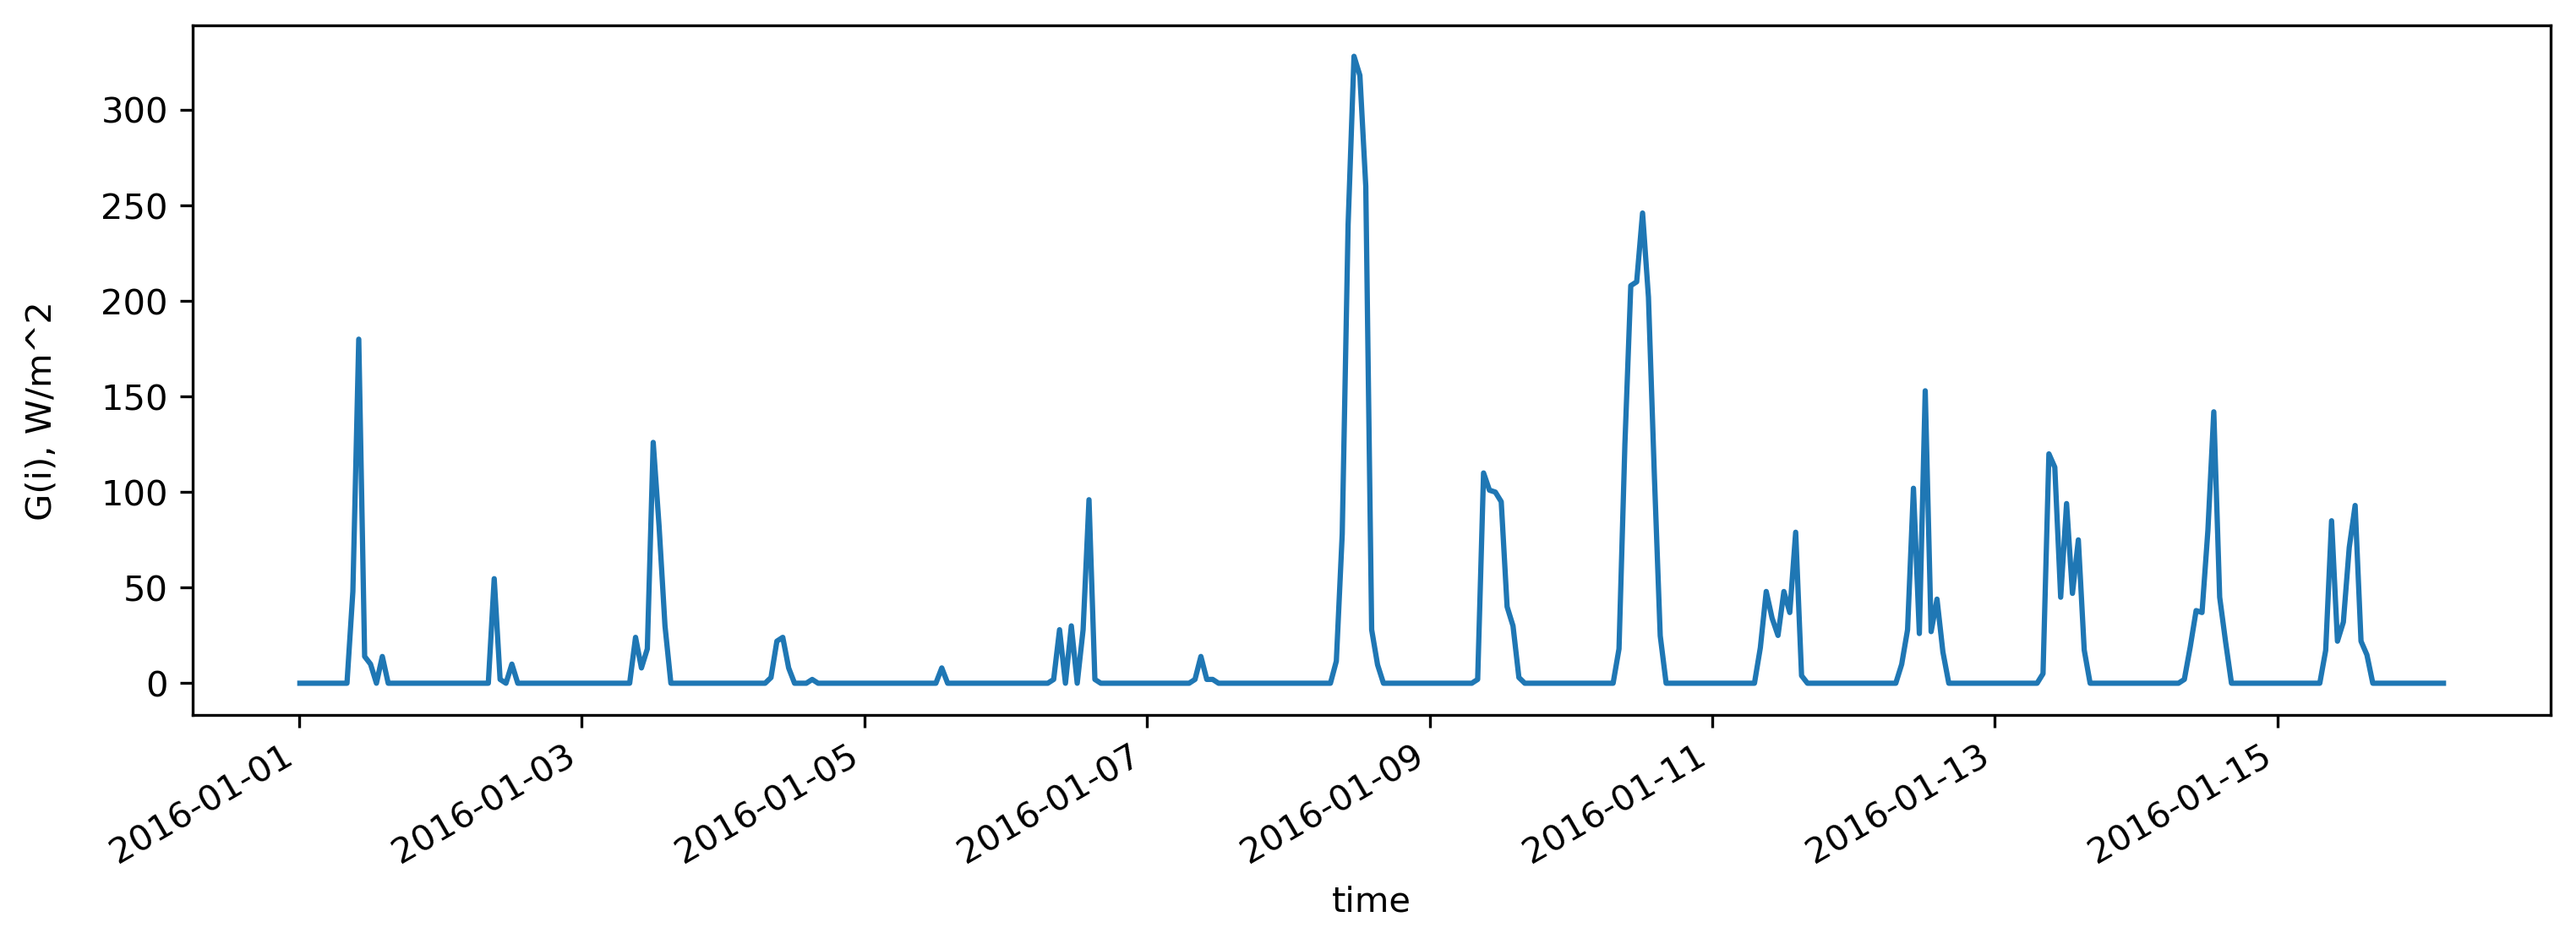

In [112]:
fig2, ax = plt.subplots(figsize = (12,4), dpi = 300)
df_2016["G(i)"].plot.line(ax = ax)
fig2.text(0.07, 0.5, 'G(i), W/m^2', va='center', rotation='vertical')

plt.show()

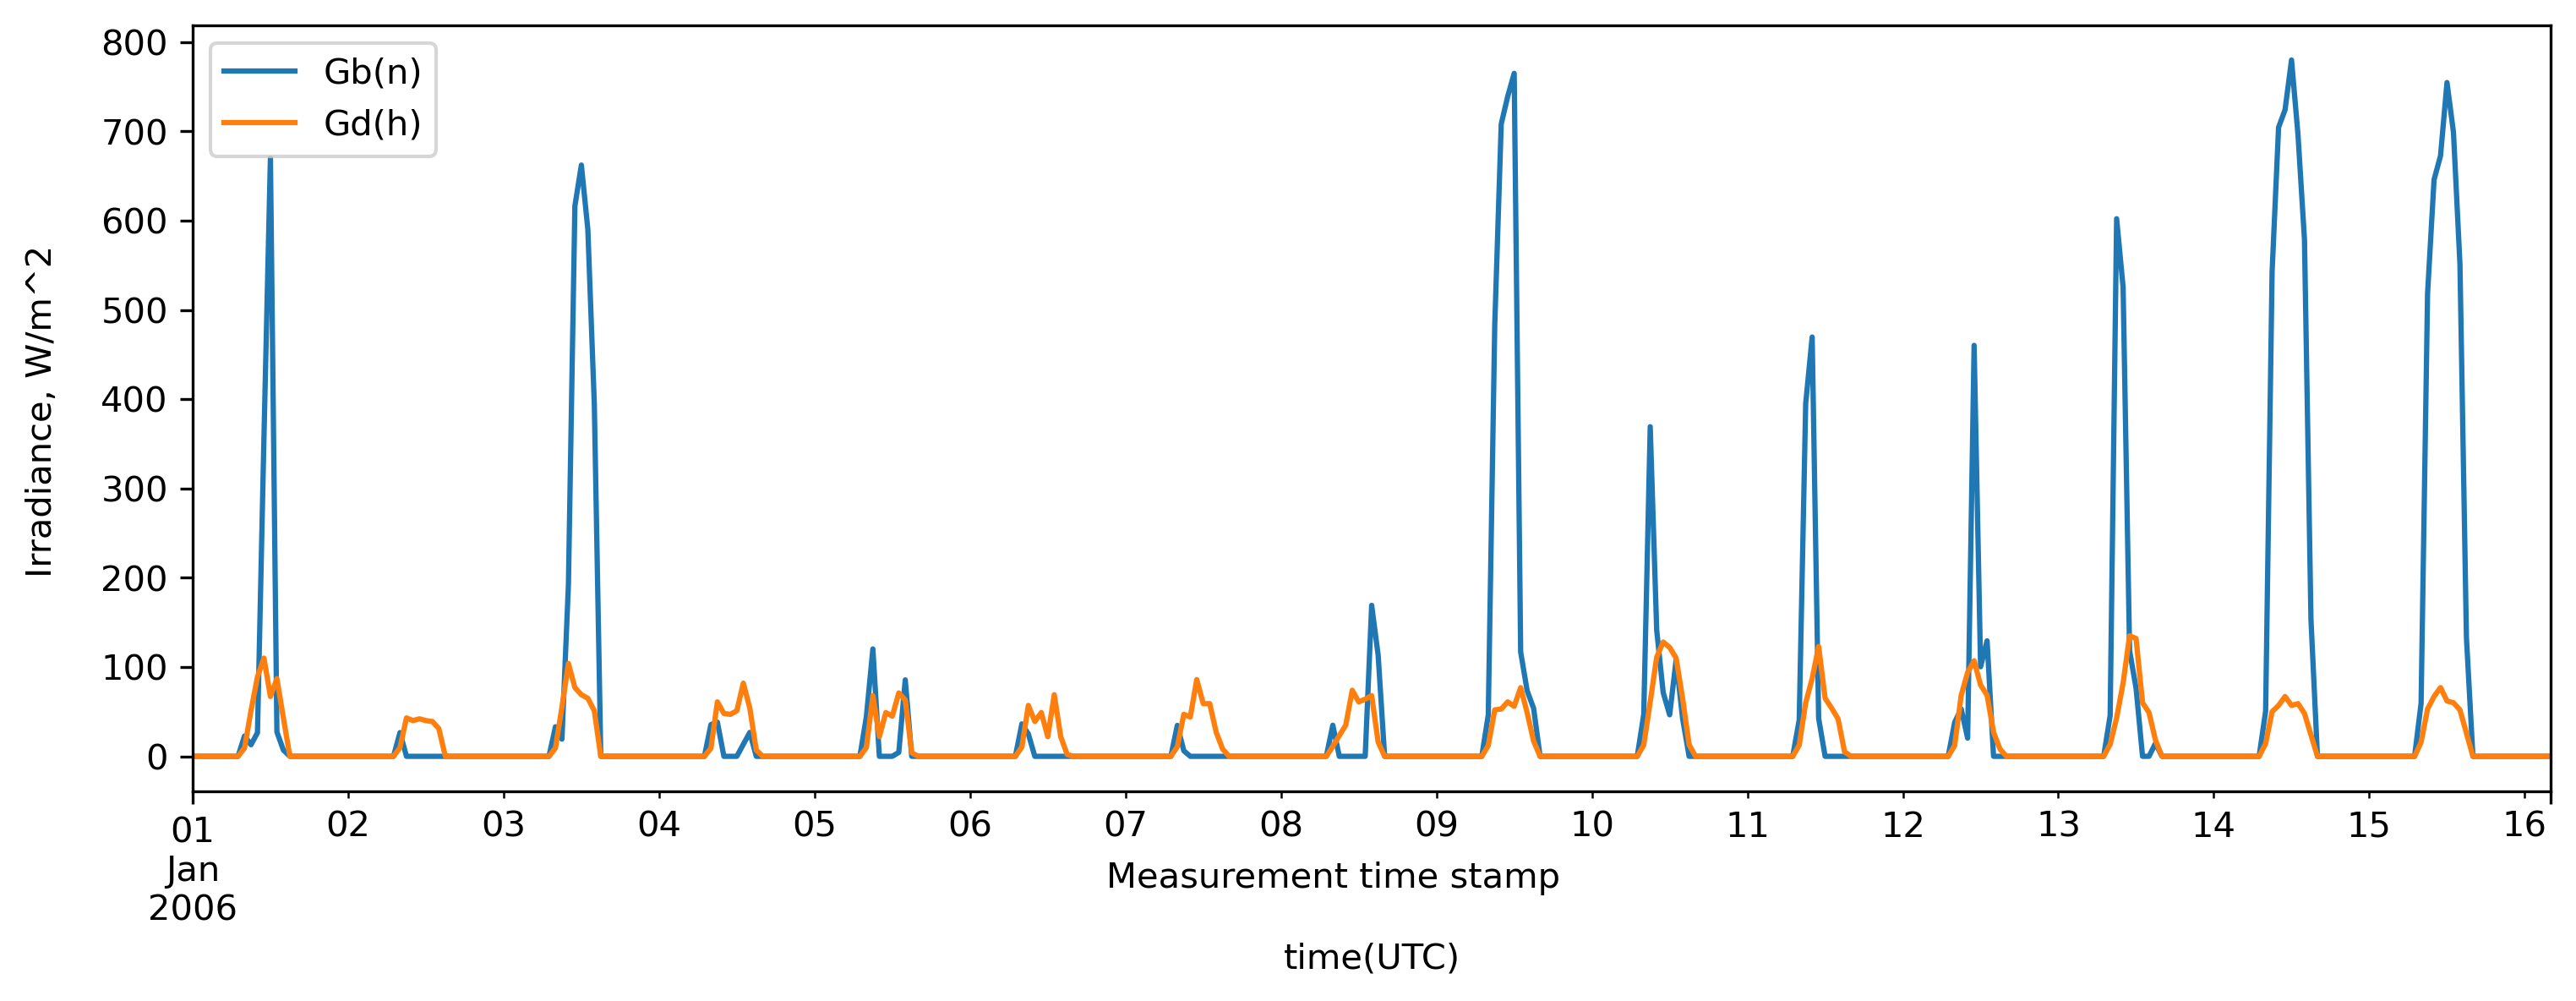

In [164]:
fig3, ax = plt.subplots(figsize = (12,4), dpi = 300)
df_2006[['Gb(n)','Gd(h)']].plot.line(ax = ax)
fig3.text(0.5, 0.03, 'Measurement time stamp', ha='center')
fig3.text(0.07, 0.5, 'Irradiance, W/m^2', va='center', rotation='vertical')

plt.show()

**Q 5.5:** Plot the same dataframe columns but for the time range from 2016-03-18 to 2016-03-24 (7 days, including both limits). 

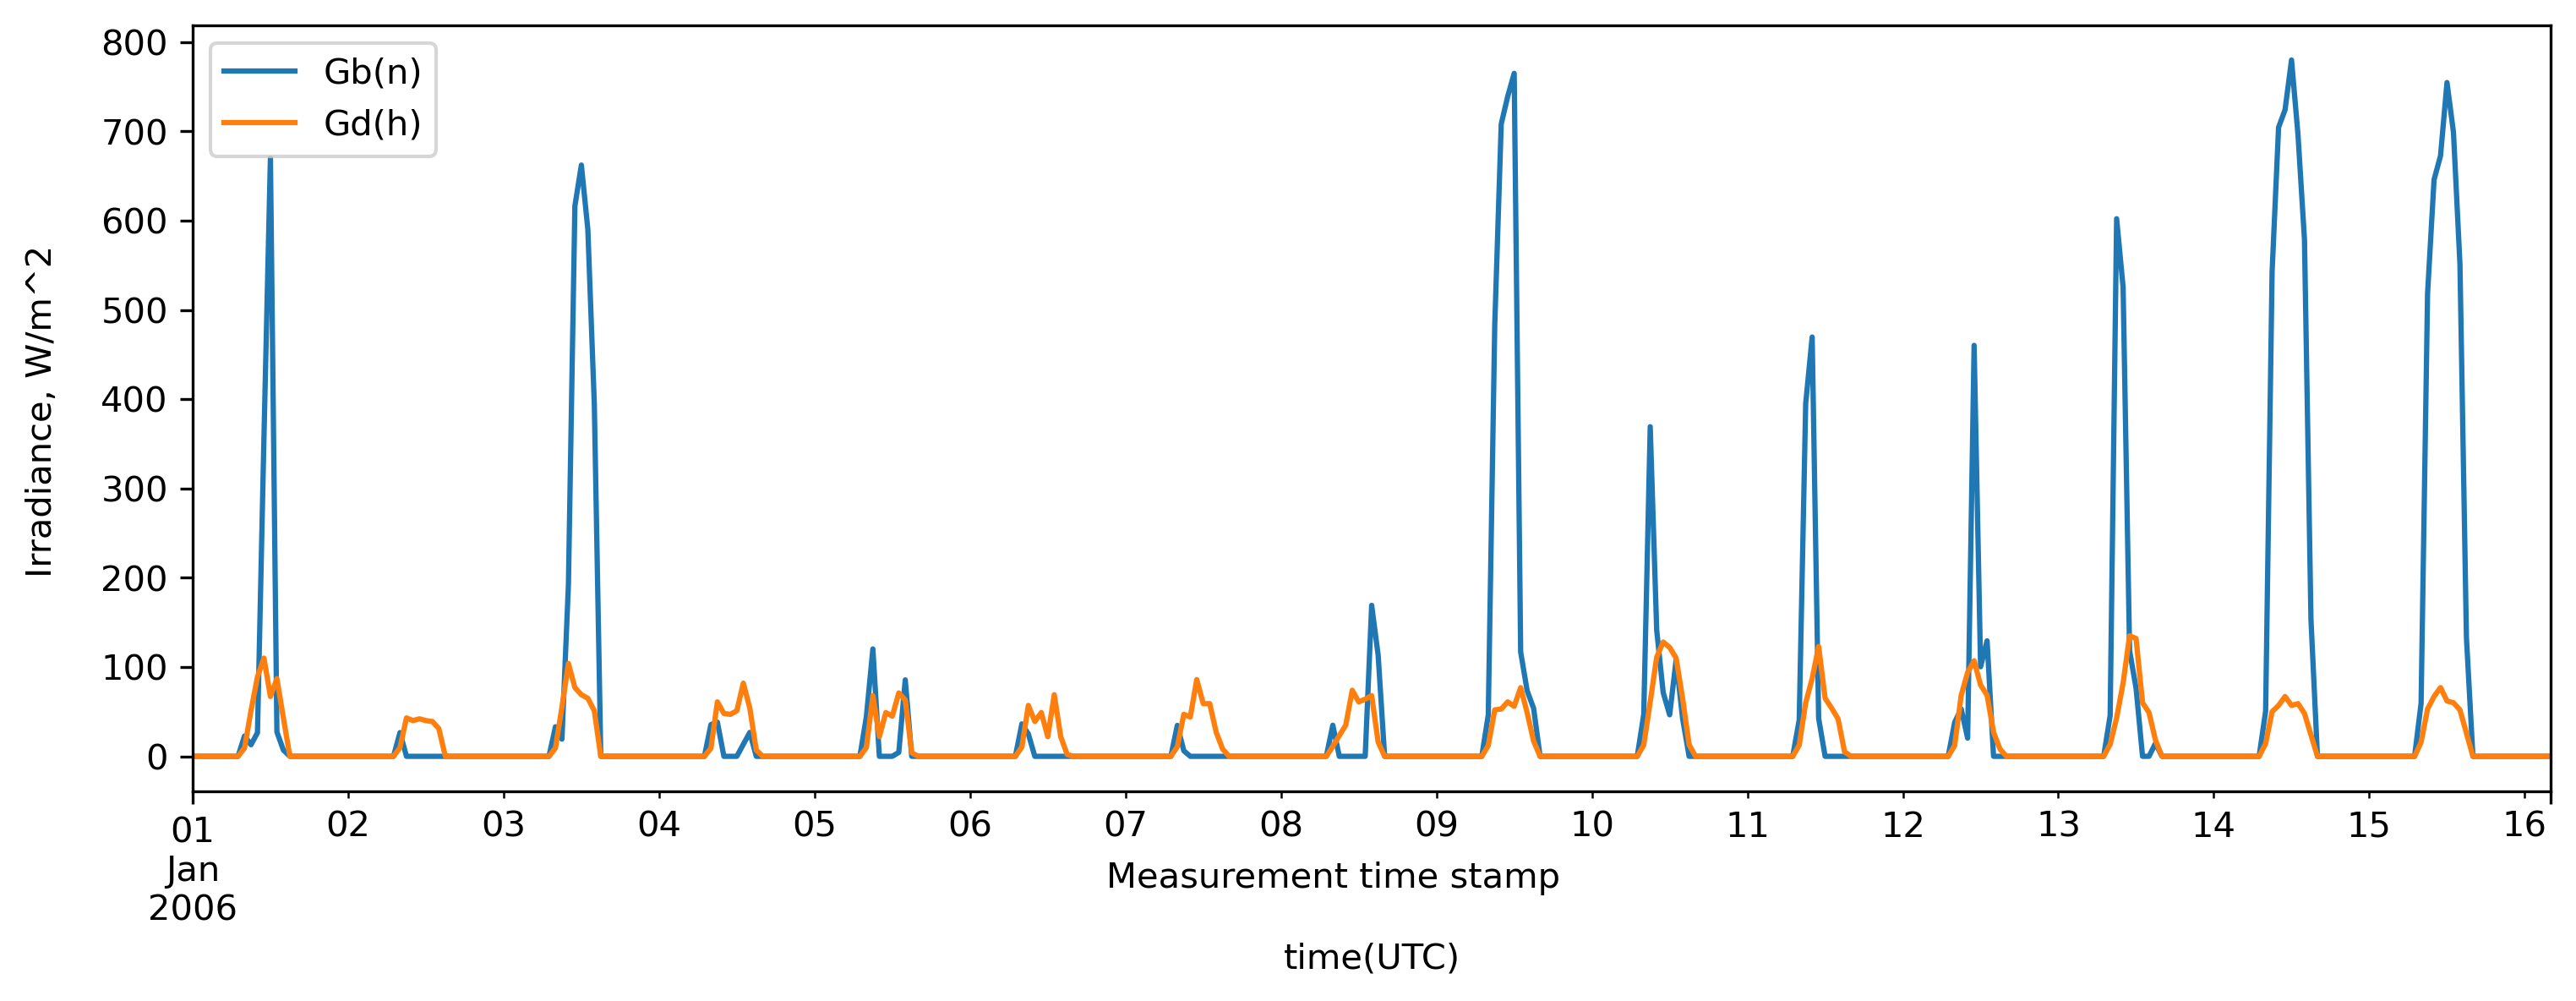

In [163]:
df_2006_ = df_2006.loc['2006-01-01 00:00:00':'2006-01-28 23:00:00']
fig3, ax = plt.subplots(figsize = (12,4), dpi = 300)
df_2006_[['Gb(n)','Gd(h)']].plot.line(ax = ax)
fig3.text(0.5, 0.03, 'Measurement time stamp', ha='center')
fig3.text(0.07, 0.5, 'Irradiance, W/m^2', va='center', rotation='vertical')

plt.show()

### Read the TMY Hourly Data from PVGIS with `pvlib.iotools.get_pvgis_tmy()`

Direct use of the PVGIS Web API provides maximum flexibility in accessing the radiation data, but is somewhat cumbersome. The `pvlib.iotools.get_pvgis_tmy()` function provides an elegant interface to the PVGIS Web API for radiation data. It selects the most representative months from the available years and provides data in **hourly** resolution.

**Q 5.6:** Read the following help on the function `get_pvgis_tmy()`. What is the **URL** of the service? What are the **four outputs** (aka returns) of the function?

**Answer:** 
**The url of the PVGIS tool:**
https://ec.europa.eu/jrc/en/pvgis
**The four returns of the function:**
data (pandas.DataFrame:
    the weather data);
months_selected (list:
    TMY year for each month);
inputs (dict:
    the inputs);
metadata (list or dict:
    file metadata);

In [218]:
# Inline help
? pvlib.iotools.get_pvgis_tmy

**Q 5.7:** Read the TMY data for the Green Fab Lab. Name the output variables according to the names of the output fields described in the above function help.

In [181]:
# Code:
#site = sites[]
tmy_data, months_selected, inputs, metadata = pvlib.iotools.get_pvgis_tmy(51.499, 6.548, map_variables=True)

In [183]:
tmy_data

,temp_air,relative_humidity,ghi,dni,dhi,IR(h),wind_speed,wind_direction,pressure
time(UTC),,,,,,,,,
2014-01-01 00:00:00+00:00,5.41,85.23,0.0,0.0,0.0,286.26,4.25,200.0,100582.0
2014-01-01 01:00:00+00:00,5.40,86.11,0.0,0.0,0.0,292.54,4.36,206.0,100589.0
2014-01-01 02:00:00+00:00,5.40,86.98,0.0,0.0,0.0,298.82,4.47,211.0,100595.0
2014-01-01 03:00:00+00:00,5.39,87.86,0.0,0.0,0.0,305.10,4.58,211.0,100605.0
2014-01-01 04:00:00+00:00,5.39,88.74,0.0,0.0,0.0,311.38,4.69,211.0,100615.0
...,...,...,...,...,...,...,...,...,...
2015-12-31 19:00:00+00:00,5.43,80.85,0.0,0.0,0.0,254.85,3.69,196.0,101951.0
2015-12-31 20:00:00+00:00,5.43,81.73,0.0,0.0,0.0,261.13,3.80,192.0,101961.0
2015-12-31 21:00:00+00:00,5.42,82.60,0.0,0.0,0.0,267.41,3.92,194.0,101974.0


In [215]:
months_selected

[{'month': 1, 'year': 2014},
 {'month': 2, 'year': 2015},
 {'month': 3, 'year': 2007},
 {'month': 4, 'year': 2009},
 {'month': 5, 'year': 2009},
 {'month': 6, 'year': 2008},
 {'month': 7, 'year': 2007},
 {'month': 8, 'year': 2007},
 {'month': 9, 'year': 2010},
 {'month': 10, 'year': 2007},
 {'month': 11, 'year': 2015},
 {'month': 12, 'year': 2015}]

**Q 5.8:** Which year provides the most typical or representative weather data for **April**? Hint: Use one of the return (output) variables of the function call above.  Attention: The selected months may vary from location to location! 

In [21]:
# Code:

# check site
# print("THE CURRENT SITE")
# print("----------------")
# print(site)

# print("\n")

# print("THE SELECTED MONTHS")
# print("-------------------")

# for ...:
#     print(f'The most representative month {elt["month"]:02d} is that of year {elt[...]}') 

**Answer:** 2009 year (from month_selected)

### Coerce Year in TMY Data

Problem: The years of the representative months selected by the TMY are not necessarily ordered. It is recommended to create a "dummy year" to keep the index data type datetime64 with time zone UTC. Then the data from Jan to Dec will be in one year.

This pandas time index is used for other purposes in the current analysis, too.

In [193]:
times = pd.date_range('2019-01-01 00:00:00', '2019-12-31 23:00:00', freq='H', tz=tz)

In [194]:
times

DatetimeIndex(['2019-01-01 00:00:00+01:00', '2019-01-01 01:00:00+01:00',
               '2019-01-01 02:00:00+01:00', '2019-01-01 03:00:00+01:00',
               '2019-01-01 04:00:00+01:00', '2019-01-01 05:00:00+01:00',
               '2019-01-01 06:00:00+01:00', '2019-01-01 07:00:00+01:00',
               '2019-01-01 08:00:00+01:00', '2019-01-01 09:00:00+01:00',
               ...
               '2019-12-31 14:00:00+01:00', '2019-12-31 15:00:00+01:00',
               '2019-12-31 16:00:00+01:00', '2019-12-31 17:00:00+01:00',
               '2019-12-31 18:00:00+01:00', '2019-12-31 19:00:00+01:00',
               '2019-12-31 20:00:00+01:00', '2019-12-31 21:00:00+01:00',
               '2019-12-31 22:00:00+01:00', '2019-12-31 23:00:00+01:00'],
              dtype='datetime64[ns, Europe/Berlin]', length=8760, freq='H')

In [195]:
tmy_data.index = times

In [196]:
tmy_data.head()

,temp_air,relative_humidity,ghi,dni,dhi,IR(h),wind_speed,wind_direction,pressure
2019-01-01 00:00:00+01:00,5.41,85.23,0.0,0.0,0.0,286.26,4.25,200.0,100582.0
2019-01-01 01:00:00+01:00,5.40,86.11,0.0,0.0,0.0,292.54,4.36,206.0,100589.0
2019-01-01 02:00:00+01:00,5.40,86.98,0.0,0.0,0.0,298.82,4.47,211.0,100595.0
2019-01-01 03:00:00+01:00,5.39,87.86,0.0,0.0,0.0,305.10,4.58,211.0,100605.0
2019-01-01 04:00:00+01:00,5.39,88.74,0.0,0.0,0.0,311.38,4.69,211.0,100615.0


In [197]:
tmy_data.tail()

,temp_air,relative_humidity,ghi,dni,dhi,IR(h),wind_speed,wind_direction,pressure
2019-12-31 19:00:00+01:00,5.43,80.85,0.0,0.0,0.0,254.85,3.69,196.0,101951.0
2019-12-31 20:00:00+01:00,5.43,81.73,0.0,0.0,0.0,261.13,3.80,192.0,101961.0
2019-12-31 21:00:00+01:00,5.42,82.60,0.0,0.0,0.0,267.41,3.92,194.0,101974.0
2019-12-31 22:00:00+01:00,5.42,83.48,0.0,0.0,0.0,273.69,4.03,196.0,101987.0
2019-12-31 23:00:00+01:00,5.41,84.36,0.0,0.0,0.0,279.98,4.14,197.0,102001.0


In [198]:
tmy_data.index

DatetimeIndex(['2019-01-01 00:00:00+01:00', '2019-01-01 01:00:00+01:00',
               '2019-01-01 02:00:00+01:00', '2019-01-01 03:00:00+01:00',
               '2019-01-01 04:00:00+01:00', '2019-01-01 05:00:00+01:00',
               '2019-01-01 06:00:00+01:00', '2019-01-01 07:00:00+01:00',
               '2019-01-01 08:00:00+01:00', '2019-01-01 09:00:00+01:00',
               ...
               '2019-12-31 14:00:00+01:00', '2019-12-31 15:00:00+01:00',
               '2019-12-31 16:00:00+01:00', '2019-12-31 17:00:00+01:00',
               '2019-12-31 18:00:00+01:00', '2019-12-31 19:00:00+01:00',
               '2019-12-31 20:00:00+01:00', '2019-12-31 21:00:00+01:00',
               '2019-12-31 22:00:00+01:00', '2019-12-31 23:00:00+01:00'],
              dtype='datetime64[ns, Europe/Berlin]', length=8760, freq='H')

## 6. Compare Plane-of-Array Irradiance (POA) Based on Clear Sky (CS) and Typical Meteorological Year (TMY)

Finally the Plane-of-Array (POA) Irradiance matters. It is the total irradiance at the surface of the PV modules. This radiant flux (aka radiant power density) is collected over the area of the PV modules. The energy collected over a longer time period is called insolation, e.g. how many Joules or Watt-hours of energy are produced in a year.

The POA irradiance (aka POA) is a result of many irradiance components, such as direct, diffuse or even ground reflected irradiance. Often shading by the horizon profile (e.g. buildings or trees) or by other module rows has sometimes to be taken into account to get more realistic irrandiance components.

The main function is `pvlib.irradiance.get_total_irradiance()`. Read the signature from the online help below: `? pvlib.irradiance.get_total_irradiance`

* The variables starting with `surface_...` are related to the **module orientation.**
* The input parameters `solar_zenith` and `solar_azimuth` come from the **solar position.**
* `dni`, `ghi`and `dhi` are irradiance components provided by an external irradiance model (e.g. clear sky) or measurment based data (e.g. TMY). 

In [199]:
? pvlib.irradiance.get_total_irradiance

### Solar Position

The function signature above shows that `solar_zenith` and `solar_azimuth` are input parameters. They come from the solar position.

In [200]:
# Code and comments are from here: 
# https://pvlib-python.readthedocs.io/en/stable/gallery/irradiance-transposition/plot_transposition_gain.html
#
# calculate the necessary variables to do transposition.  Note that solar
# position doesn't depend on array orientation, so we just calculate it once.
# Note also that TMY datasets are right-labeled hourly intervals, e.g. the
# 10AM to 11AM interval is labeled 11.  We should calculate solar position in
# the middle of the interval (10:30), so we subtract 30 minutes:
times_solpos = tmy_data.index - pd.Timedelta('30min') # use the times from the TMY and subtract 30 mins.
solar_position = site.get_solarposition(times=times_solpos)
# but remember to shift the index back to line up with the TMY data:
solar_position.index += pd.Timedelta('30min')

In [201]:
solar_position

,apparent_zenith,zenith,apparent_elevation,elevation,azimuth,equation_of_time
2019-01-01 00:00:00+01:00,148.751259,148.751259,-58.751259,-58.751259,329.268951,-3.166140
2019-01-01 01:00:00+01:00,151.511704,151.511704,-61.511704,-61.511704,356.625679,-3.185965
2019-01-01 02:00:00+01:00,149.758684,149.758684,-59.758684,-59.758684,24.750929,-3.205782
2019-01-01 03:00:00+01:00,144.187094,144.187094,-54.187094,-54.187094,48.088943,-3.225590
2019-01-01 04:00:00+01:00,136.350694,136.350694,-46.350694,-46.350694,65.965056,-3.245391
...,...,...,...,...,...,...
2019-12-31 19:00:00+01:00,106.853597,106.853597,-16.853597,-16.853597,253.908481,-2.952394
2019-12-31 20:00:00+01:00,116.013238,116.013238,-26.013238,-26.013238,265.000659,-2.972316
2019-12-31 21:00:00+01:00,125.328189,125.328189,-35.328189,-35.328189,276.853599,-2.992228
2019-12-31 22:00:00+01:00,134.383100,134.383100,-44.383100,-44.383100,290.457774,-3.012131


### POA Irradiance from TMY

The function [**pvlib.irradiance.get_total_irradiance()**](https://pvlib-python.readthedocs.io/en/stable/reference/generated/pvlib.irradiance.get_total_irradiance.html) does the main job to get the irradiance at the surface of the PV array, i.e. on the POA. The series (column) `poa_global`is the total in-plane irradiance.
<br>**Notice: You used the function before but now we are using real meteorologial TMY data instead of clear sky!**

In [219]:
? pvlib.irradiance.get_total_irradiance

In [220]:
surface_azimuth = 225
surface_tilt = 30

In [221]:
poa_tmy_irradiance = pvlib.irradiance.get_total_irradiance(
    surface_tilt=surface_tilt,
    surface_azimuth=surface_azimuth,
    dni=tmy_data['dni'],
    ghi=tmy_data['ghi'],
    dhi=tmy_data['dhi'],
    solar_zenith=solar_position['apparent_zenith'],
    solar_azimuth=solar_position['azimuth'],
    model='isotropic')


In [222]:
poa_tmy_irradiance

,poa_global,poa_direct,poa_diffuse,poa_sky_diffuse,poa_ground_diffuse
2019-01-01 00:00:00+01:00,0.0,-0.0,0.0,0.0,0.0
2019-01-01 01:00:00+01:00,0.0,-0.0,0.0,0.0,0.0
2019-01-01 02:00:00+01:00,0.0,-0.0,0.0,0.0,0.0
2019-01-01 03:00:00+01:00,0.0,-0.0,0.0,0.0,0.0
2019-01-01 04:00:00+01:00,0.0,-0.0,0.0,0.0,0.0
...,...,...,...,...,...
2019-12-31 19:00:00+01:00,0.0,0.0,0.0,0.0,0.0
2019-12-31 20:00:00+01:00,0.0,-0.0,0.0,0.0,0.0
2019-12-31 21:00:00+01:00,0.0,-0.0,0.0,0.0,0.0
2019-12-31 22:00:00+01:00,0.0,-0.0,0.0,0.0,0.0


### POA Irradiance from CS

In [223]:
clearsky = site.get_clearsky(times)

In [224]:
clearsky.head(24)

,ghi,dni,dhi
2019-01-01 00:00:00+01:00,0.000000,0.000000,0.000000
2019-01-01 01:00:00+01:00,0.000000,0.000000,0.000000
2019-01-01 02:00:00+01:00,0.000000,0.000000,0.000000
2019-01-01 03:00:00+01:00,0.000000,0.000000,0.000000
2019-01-01 04:00:00+01:00,0.000000,0.000000,0.000000
2019-01-01 05:00:00+01:00,0.000000,0.000000,0.000000
2019-01-01 06:00:00+01:00,0.000000,0.000000,0.000000
2019-01-01 07:00:00+01:00,0.000000,0.000000,0.000000
2019-01-01 08:00:00+01:00,0.000000,0.000000,0.000000
2019-01-01 09:00:00+01:00,4.615736,43.591659,3.142002


In [225]:
poa_cs_irradiance = pvlib.irradiance.get_total_irradiance(
    surface_tilt=surface_tilt,
    surface_azimuth=surface_azimuth,
    dni=clearsky['dni'],
    ghi=clearsky['ghi'],
    dhi=clearsky['dhi'],
    solar_zenith=solar_position['apparent_zenith'],
    solar_azimuth=solar_position['azimuth'],
    model='isotropic')

In [226]:
poa_cs_irradiance

,poa_global,poa_direct,poa_diffuse,poa_sky_diffuse,poa_ground_diffuse
2019-01-01 00:00:00+01:00,0.0,-0.0,0.0,0.0,0.0
2019-01-01 01:00:00+01:00,0.0,-0.0,0.0,0.0,0.0
2019-01-01 02:00:00+01:00,0.0,-0.0,0.0,0.0,0.0
2019-01-01 03:00:00+01:00,0.0,-0.0,0.0,0.0,0.0
2019-01-01 04:00:00+01:00,0.0,-0.0,0.0,0.0,0.0
...,...,...,...,...,...
2019-12-31 19:00:00+01:00,0.0,0.0,0.0,0.0,0.0
2019-12-31 20:00:00+01:00,0.0,-0.0,0.0,0.0,0.0
2019-12-31 21:00:00+01:00,0.0,-0.0,0.0,0.0,0.0
2019-12-31 22:00:00+01:00,0.0,-0.0,0.0,0.0,0.0


### Compare Daily POA Irradiances from TMY Data and Clear Sky Data

The question is how many joules per square meter were collected in one day. This is the daily irradiance. 

Pandas dataframes have another fantastic function: `df.resample()`. Read the article "Using the Pandas 'Resample' Function" by Jeremy Chow on [Towards Data Science](https://towardsdatascience.com/using-the-pandas-resample-function-a231144194c4).

Aggregate the hourly time series to daily time series:

In [227]:
poa_tmy_daily = poa_tmy_irradiance.resample('d').sum()
poa_cs_daily = poa_cs_irradiance.resample('d').sum()

In [228]:
poa_tmy_daily

,poa_global,poa_direct,poa_diffuse,poa_sky_diffuse,poa_ground_diffuse
2019-01-01 00:00:00+01:00,1437.672292,1044.347147,393.325145,375.071106,18.254039
2019-01-02 00:00:00+01:00,298.076994,12.998415,285.078579,279.903811,5.174769
2019-01-03 00:00:00+01:00,627.251006,224.024196,403.226810,393.731360,9.495450
2019-01-04 00:00:00+01:00,496.904606,25.287983,471.616623,462.774300,8.842323
2019-01-05 00:00:00+01:00,1324.775705,905.606091,419.169614,400.262449,18.907165
...,...,...,...,...,...
2019-12-27 00:00:00+01:00,882.599673,401.181520,481.418153,468.372376,13.045776
2019-12-28 00:00:00+01:00,974.234113,501.583824,472.650290,457.176224,15.474066
2019-12-29 00:00:00+01:00,1132.476472,662.524739,469.951733,454.377186,15.574547
2019-12-30 00:00:00+01:00,1171.226342,740.087904,431.138439,414.257640,16.880799


In [229]:
poa_cs_daily

,poa_global,poa_direct,poa_diffuse,poa_sky_diffuse,poa_ground_diffuse
2019-01-01 00:00:00+01:00,1794.199091,1540.637529,253.561562,237.335720,16.225842
2019-01-02 00:00:00+01:00,1807.306799,1551.485325,255.821474,239.433115,16.388359
2019-01-03 00:00:00+01:00,1821.665848,1563.417177,258.248671,241.682243,16.566428
2019-01-04 00:00:00+01:00,1837.259159,1576.417451,260.841707,244.081613,16.760094
2019-01-05 00:00:00+01:00,1854.067742,1590.468783,263.598959,246.629560,16.969398
...,...,...,...,...,...
2019-12-27 00:00:00+01:00,1745.903367,1501.345866,244.557501,228.934638,15.622863
2019-12-28 00:00:00+01:00,1752.239172,1506.316088,245.923085,230.218660,15.704425
2019-12-29 00:00:00+01:00,1759.883266,1512.422845,247.460421,231.659103,15.801318
2019-12-30 00:00:00+01:00,1768.829125,1519.660002,249.169123,233.255539,15.913584


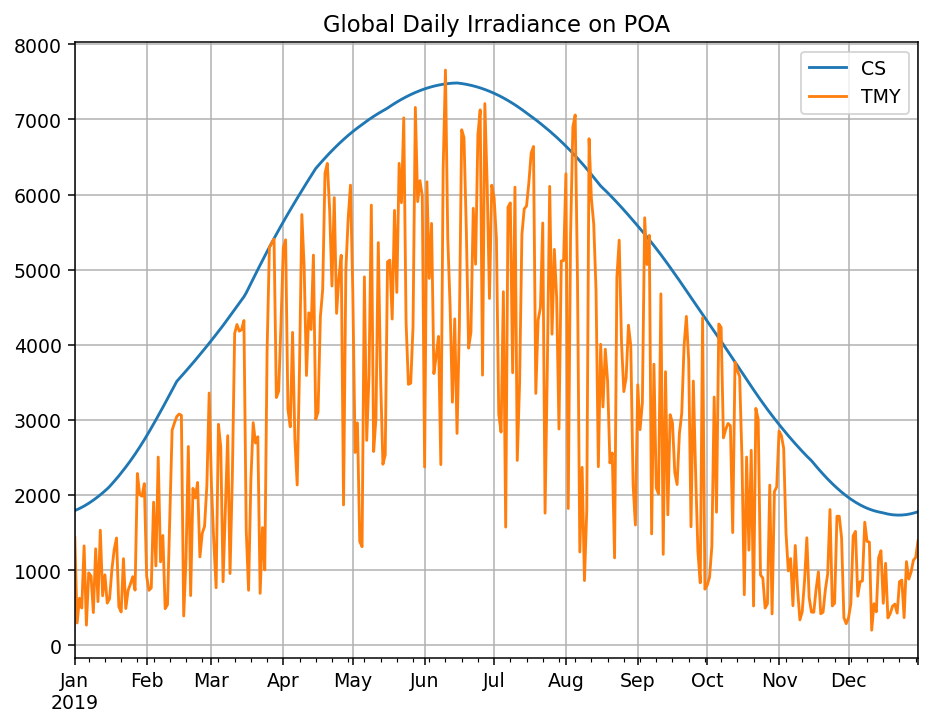

In [213]:
fig1, ax1 = plt.subplots(figsize=(8,6), dpi=136)
poa_cs_daily["poa_global"].plot(ax=ax1, label="CS")
poa_tmy_daily["poa_global"].plot(ax=ax1, label="TMY")
ax1.set_title("Global Daily Irradiance on POA")
ax1.grid(True)
ax1.legend()
plt.show()

**Q 6.1:** What is the variable on the y-axis? What is its unit? Add axis labels and title to the plot!

**Answer:** On the y-axis we have number of joules per square meter that were collected in one day.

**Q 6.2:** Why is the CS curve to smooth and TMY not?

**Answer:** Because TMY provides the information that depends on different weather conditions. Clear sky data only provides information about energy with the clear sky every day. The amount of energy changes because of the rotation of Earth and seasons changing.

**Q 6.3:** Aggregate the time series on a monthly instead of daily grid. Plot the monthly aggregates! Use the right units!

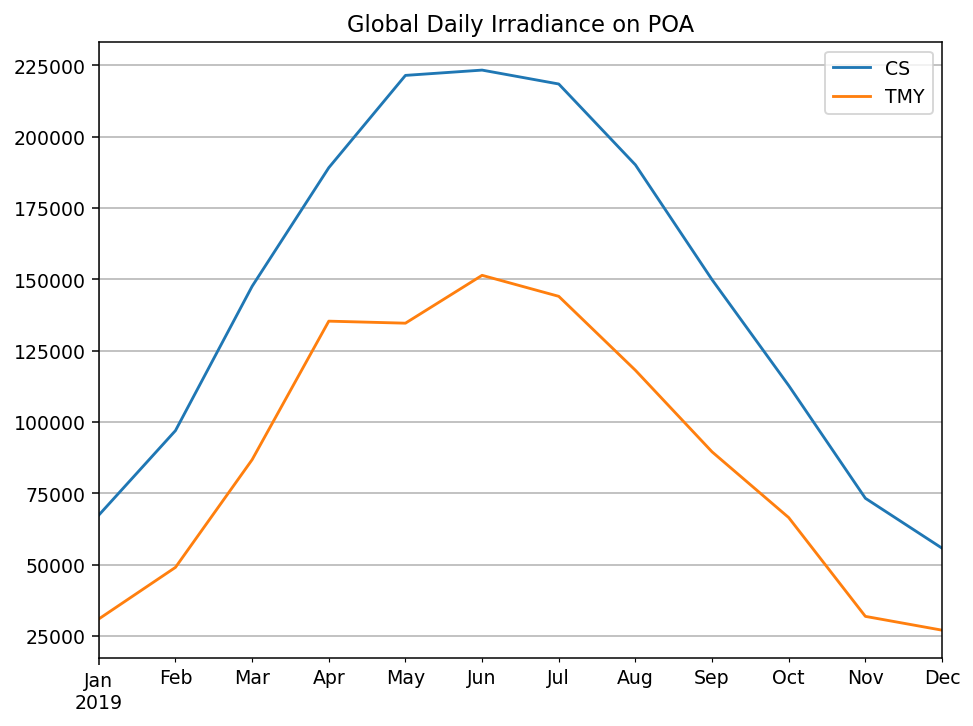

In [214]:
poa_tmy_monthly = poa_tmy_irradiance.resample('M').sum()
poa_cs_monthly = poa_cs_irradiance.resample('M').sum()

fig2, ax2 = plt.subplots(figsize=(8,6), dpi=136)
poa_cs_monthly["poa_global"].plot(ax=ax2, label="CS")
poa_tmy_monthly["poa_global"].plot(ax=ax2, label="TMY")
ax2.set_title("Global Daily Irradiance on POA")
ax2.grid(True)
ax2.legend()
plt.show()

**Q 6.4:** Why is now the TMY curve relatively smooth? What is the ratio of TMY and CS curves? The next step in the analysis would be to use a PV module model to transform the POA irradiance to electrical output. Which POA irradiance would you use to estimate the PV power output: based on TMY or CS?

**Answer:** Because the monthly weather doesn't significantly change from year to year. It means that we have almost the same curve as CS but with lower energy values because of some bad weather days.

## 7. Do something exciting!

**Design your own analysis!** You are **free** to apply your knowledge about **PVLIB** to your own ideas! Would you like to do an [**tilt angle opimization**](https://pvlib-python.readthedocs.io/en/stable/gallery/irradiance-transposition/plot_transposition_gain.html) or would you like to **choose another location** and compare the POA with that at the Green Fab Lab in Kamp-Lintfort, Germany or **anything else?** Do what you would like to do but it has to be an **application of PVLIB!**
